<a href="https://colab.research.google.com/github/Shailendra114/Books-Recommendation-System-Unsupervised-Machine-Learning-/blob/main/(Team_Notebook)_Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

===================================================================================================================


# Book Recommendation System 

===================================================================================================================

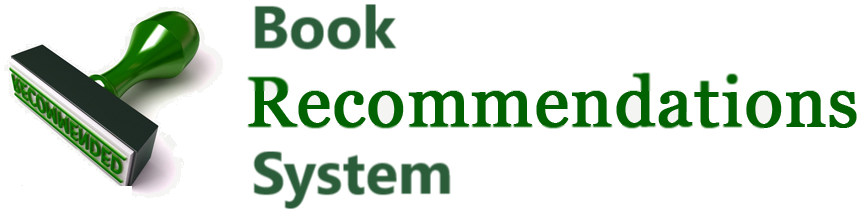

===================================================================================================================

# Problem Statement


===================================================================================================================




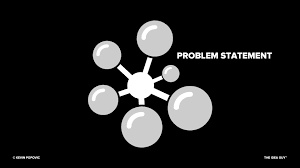

===================================================================================================================





### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.


### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).


### Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

===================================================================================================================

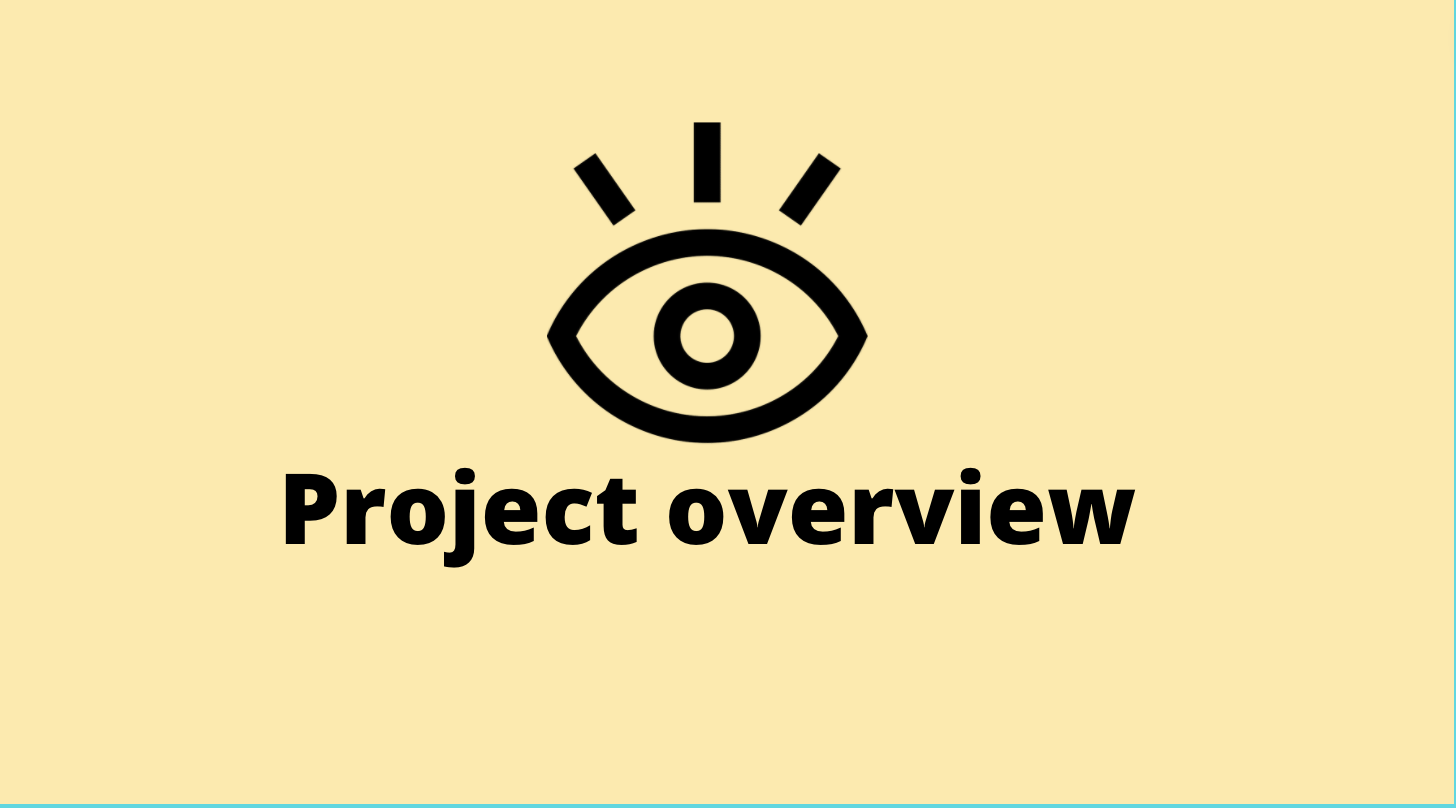

===================================================================================================================

### The booming technology of the modern world has given rise to the enormous book websites. This makers the buyers to choose the best books to read as books play a vital role in many people’s life. The various kinds of books come into existence on day to day basis. So in order to eliminate this critical situation the recommendation system has been introduced in which the suggestion on the various books can be provided based on the analysis of the buyer’s interest. The Book Recommendation System is an intelligent algorithm which reduces the overhead of the people. This provides benefit to both the seller and the consumer creating the win-win situation. The E-commerce site to network security, all demands the need for the recommended system to increase their revenue rate. The content filtering, association rule mining and collaborative filtering are the various decision making techniques employed in the recommendation system as it helps buyers by the strong recommendations as there are various books, buyer’s sometimes cannot find the item they search for. The Book Recommendation System is widely implemented using search engines comprising of data sets.

===================================================================================================================

### Want to know more about Book Recommendation system [Click Here](https://www.analyticsvidhya.com/blog/2021/06/build-book-recommendation-system-unsupervised-learning-project/)    

===================================================================================================================

# Dataset Information:


### The Book-Crossing dataset comprises 3 files.
###● **Users:-**
####Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.


###**● Books:-**
####Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.


###**● Ratings:-**
####Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

===================================================================================================================

# Objective of Project:


 


### **1.)** The main objective is to create a machine learning model to recommend relevant books to users based on popularity and user interests.

###**2.)** In addition to the ML Model prediction, we also have taken into account the book recommendation for a totally new user.



===================================================================================================================

# Process Outline:

Ill paste the photo,dont worry

===================================================================================================================

# Step 1: Data Loading

In [1]:
# lets import the important libraries to upload dataset and read it
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')


For data loading,we have to follow two steps--

* Mount our drive and
* Uplopad the dataset
Since Our drive is already mounted so lets upload the dataset.

We are having three dataset--

* Books
* Ratings
* Users

Lets upload the dataset one by one and do the operations.We will first upload books dataset,then User dataset and at last ratings dataset

In [2]:
# loading books data set
books = pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Books.csv')

In [ ]:
# loading users data set
users = pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Users.csv')

In [ ]:
# loading Ratings data set
ratings = pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Ratings.csv')

===================================================================================================================

# Step 2: Data Preprocessing 

===================================================================================================================

 



Lets first preprocess books dataset--



**Books-Data Preprocessing:-**

In [ ]:
# lets check the shape of the dataset
books.shape

(271360, 8)

So,our dataset has 271360 rows and 8 columns.Lets check the different columns of our dataset.

In [ ]:
# Lets check the different coluns of our dataset
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

So, the different columns of our books dataset are--

* ISBN (It is the unique number for different books)
* Book-Title (It is the title of the books)
* Book-Author (The author of the book)
* Year-Of-Publication (It is the year when book was published)
* Publisher (It is the name of the publisher)
* Image-URL-S (It is URL of the books categorizing it as small)
* Image-URL-M (It is URL of the books categorizing it as medium)
* Image-URL-L (It is URL of the books categorizing it as large)

In [ ]:
# lets check our data from above and below 
books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
# lets describe the dataset
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
# lets check data type of dataset
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

In [ ]:
#checking unique values of different features of the books dataset
books.apply(lambda x: len(x.unique()))

ISBN                   271360
Book-Title             242135
Book-Author            102024
Year-Of-Publication       202
Publisher               16808
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271042
dtype: int64

So, we can see that all the features has many unique values.And Year of publication has minimum unique values.

In [ ]:
## Checking for null values
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Since Books are identified by their respective ISBN and Invalid ISBNs have already been removed from the dataset,lets check the unique values of different features of the books dataset.

In [ ]:
books['Book-Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'Lily Dale : The True Story of the Town that Talks to the Dead',
       "Republic (World's Classics)",
       "A Guided Tour of Rene Descartes' Meditations on First Philosophy with Complete Translations of the Meditations by Ronald Rubin"],
      dtype=object)

In [ ]:
books['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [ ]:
books['Image-URL-S'].unique()

array(['http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg',
       ...,
       'http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg',
       'http://images.amazon.com/images/P/0767409752.01.THUMBZZZ.jpg'],
      dtype=object)

In [ ]:
books.Publisher.unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [ ]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Since,we can see that their are some values in Year-of-publication column like,'DK Publishing Inc','Gallimard','2024','2037','2030',2038, 2026,which could not be there in dataset so,we have to manipulate it before developing a recommender system.

In [ ]:
# lets check in how many rows are the year as DK Publishing inc
books.loc[books['Year-Of-Publication']=='DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


So, there are two rows in which the Year of Publication is as 'DK Publishing Inc'.We can see that the values are written at wrong places lets make it as correct place.

In [3]:
# Lets correct the values of index number 209538 and 221678 
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = '2000'
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = '2000'
books.at[221687 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'

In [ ]:
# now lets check values of index 209538
books.loc[209538]

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/078946697X.0...
Image-URL-M            http://images.amazon.com/images/P/078946697X.0...
Image-URL-L                                                          NaN
Name: 209538, dtype: object

In [ ]:
# now lets check values of index 221678
books.loc[221678]

ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Image-URL-S            http://images.amazon.com/images/P/0789466953.0...
Image-URL-M            http://images.amazon.com/images/P/0789466953.0...
Image-URL-L                                                          NaN
Name: 221678, dtype: object

Great,we have corrected these values.

Now lets check in how many rows are year of publication as ,'Gallimard'

In [ ]:
# Lets check in hiw many rows are the year of publicatiobn as gallimard
books.loc[books['Year-Of-Publication']=='Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


So, we can see that in only one row there is year of publication as Gallimard.We can see that the values are written at wrong places.So lets write at its correct place.

In [4]:
# lets coorect the values at index 220731
books.at[220731,'Book-Author']='Jean-Marie Gustave Le'
books.at[220731,'Book-Title']='Peuple du cel,suivi de les Bergers'
books.at[220731,'Publisher']='Gallimard'
books.at[220731,'Year-Of-Publication']='2003'

In [ ]:
# lets check the values of index 220731
books.loc[220731]

ISBN                                                          2070426769
Book-Title                            Peuple du cel,suivi de les Bergers
Book-Author                                        Jean-Marie Gustave Le
Year-Of-Publication                                                 2003
Publisher                                                      Gallimard
Image-URL-S            http://images.amazon.com/images/P/2070426769.0...
Image-URL-M            http://images.amazon.com/images/P/2070426769.0...
Image-URL-L                                                          NaN
Name: 220731, dtype: object

Great, we corrected this value as.

Now since we are living in 2022 so we have to remove values in which the year of opublication is greater than 2022.Lets do that--

In [5]:
# Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [6]:
# Lets print all the different values in year of publication column
print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [ ]:
# lets check how many values of year of publication are greater than 2022 years
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   13
Book-Title             13
Book-Author            13
Year-Of-Publication    13
Publisher              13
Image-URL-S            13
Image-URL-M            13
Image-URL-L            13
dtype: int64

In [ ]:
# lets check which are the year of publications which is greater than 2022
books.loc[books['Year-Of-Publication']>2022]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEA...,Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...,http://images.amazon.com/images/P/0671746103.0...
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY ...,Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...,http://images.amazon.com/images/P/0671791990.0...
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...,http://images.amazon.com/images/P/0870449842.0...
80264,0140301690,Alice's Adventures in Wonderland and Through t...,Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...,http://images.amazon.com/images/P/0140301690.0...
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...,http://images.amazon.com/images/P/0140201092.0...
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...,http://images.amazon.com/images/P/0394701658.0...
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...,http://images.amazon.com/images/P/3442436893.0...
192993,0870446924,"Field Guide to the Birds of North America, 3rd...",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...,http://images.amazon.com/images/P/0870446924.0...
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...,http://images.amazon.com/images/P/0671266500.0...
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...,http://images.amazon.com/images/P/0684718022.0...


In [ ]:
# lets check how many values of year of publication are equal to zero
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   4618
Book-Title             4618
Book-Author            4618
Year-Of-Publication    4618
Publisher              4618
Image-URL-S            4618
Image-URL-M            4618
Image-URL-L            4618
dtype: int64

In [ ]:
# lets see the Year of publication which is 0
books.loc[books['Year-Of-Publication']==0]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


So, we can see that there are 13 values which are greater than 2022 and 4618 values which are equal to zero in year of publication column which we have to treat before moving ahead.

In [7]:
# Replacing Invalid years with max year
from collections import Counter
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [8]:
# lets replace all values of year of publicaion which are greater than 2022 and equal to zero with maximum number of years
books.loc[books['Year-Of-Publication'] > 2022, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [ ]:
# now lets verify if there any value greater than 2022
books.loc[books['Year-Of-Publication']>2022].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Great,there is no such values in year of publication column whose values are greater than 2022

In [ ]:
# similarly lets verfy if there and value equal to zero in year of publication column
books.loc[books['Year-Of-Publication']==0].count()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

Great,there is no such values in year of publication column whose values are equal to zero.

Now Our Year of Publication column is good to operate to lets check for others.

Lets check is there any null values in books dataset.

In [ ]:
# checking null values
books.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Okay,so there is one null value in Book-Author,Two null values in Publisher and three null values in Image-URL-L columns.Lets check what are those null values--

In [ ]:
# checking null value in Book-Author column
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


So,we can see that there is one value in book author column which is NaN so lets replace it with 'Others'

In [9]:
# lets replace nan value of book author with ohers 
books.at[187689 ,'Book-Author'] = 'Other'

In [ ]:
# lets check
books.loc[187689]

ISBN                                                          9627982032
Book-Title             The Credit Suisse Guide to Managing Your Perso...
Book-Author                                                        Other
Year-Of-Publication                                                 1995
Publisher                                 Edinburgh Financial Publishing
Image-URL-S            http://images.amazon.com/images/P/9627982032.0...
Image-URL-M            http://images.amazon.com/images/P/9627982032.0...
Image-URL-L            http://images.amazon.com/images/P/9627982032.0...
Name: 187689, dtype: object

Great,we have replaced it.

Now lets check null values in Publisher column

In [ ]:
# checking null values in Publisher column
books.loc[books['Publisher'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


So, we can see that there are two null values in publisher column.Lets replace it with 'Others'

In [10]:
# Lets replace null values of Publisher column with others
books.at[128890,'Publisher']='Others'
books.at[129037,'Publisher']='Others'

In [ ]:
# lets verify for first
books.loc[128890]

ISBN                                                          193169656X
Book-Title                                                   Tyrant Moon
Book-Author                                              Elaine Corvidae
Year-Of-Publication                                                 2002
Publisher                                                         Others
Image-URL-S            http://images.amazon.com/images/P/193169656X.0...
Image-URL-M            http://images.amazon.com/images/P/193169656X.0...
Image-URL-L            http://images.amazon.com/images/P/193169656X.0...
Name: 128890, dtype: object

In [ ]:
# lets verify for second
books.loc[129037]

ISBN                                                          1931696993
Book-Title                                               Finders Keepers
Book-Author                                              Linnea Sinclair
Year-Of-Publication                                                 2001
Publisher                                                         Others
Image-URL-S            http://images.amazon.com/images/P/1931696993.0...
Image-URL-M            http://images.amazon.com/images/P/1931696993.0...
Image-URL-L            http://images.amazon.com/images/P/1931696993.0...
Name: 129037, dtype: object

Great,we have transformed this values as well.Lets now proceecd for Image URL L column

In [ ]:
 # checking null value in Image-URL-L column
books.loc[books['Image-URL-L'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du cel,suivi de les Bergers",Jean-Marie Gustave Le,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


Since we will not be doing much with image url columns so lets drop it.

In [11]:
# Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [12]:
# Lets check is there any null values
books.duplicated().any()

False

Great,There are no duplicates.

In [ ]:
# lets check is there any null values
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


Great we have manipulated our books data.

===================================================================================================================

Now its time to upload our second dataset and manipulate it.



Uploading second dataset which is user dataset

In [13]:
# Uploading second dataset
user=pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Users.csv')

**User-data Preprocessing:-**

In [ ]:
# lets check shape of user dataset
user.shape

(278858, 3)

Great,there are 278858 rows and 3 clumns in our user dataset.

In [ ]:
# lets check the columns in user dataset
user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

So, the different columns in user dataset are as follows--

* User-ID
* location
* Age

In [ ]:
# lets check user dataset from above and below
user

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [ ]:
# lets check datatype
user.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [ ]:
#checking unique values of different features of the user dataset
user.apply(lambda x: len(x.unique()))

User-ID     278858
Location     57339
Age            166
dtype: int64

Since everyone of them have unique user-Id, and different locations so we cannot do much with it.So,lets check age columns

In [ ]:
 # lets check unique values in age 
user.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

So, we can see that there is nan values and some values are there which could not be there in dataset such as age greater than 90 and less than 6 because peoples greater than 90 and less 6 years of age do not read books.So we have to remove these values.

In [ ]:
# lets check how many values are less than or equal to 6 years 
user[user['Age']<6].count()

User-ID     908
Location    908
Age         908
dtype: int64

In [ ]:
# lts check how many values are greater than 90
user[user['Age']>90].count()

User-ID     430
Location    430
Age         430
dtype: int64

So,there are 926 age values which are less or equal to 6 years of age and 430 values which are greater than or equal to 90 years of age.Since these are absurd values so we have to manipulate it.Lets change these values with mean age values.

In [14]:
# lets create a variable for required age group
required = user[user['Age'] <= 90]
required = required[required['Age'] >= 6]

In [15]:
# lets check the mean age
mean = round(required['Age'].mean())   
mean

35

So,35 years is the mean age lets replace absurd values with mean age.

In [16]:
# Lets replace the values
user.loc[user['Age'] > 90, 'Age'] = mean    #outliers with age grater than 90 are substituted with mean 
user.loc[user['Age'] < 6, 'Age'] = mean    #outliers with age less than 6 years are substitued with mean
user['Age'] = user['Age'].fillna(mean)      #filling null values with mean
user['Age'] = user['Age'].astype(int)       #changing Datatype to int

In [ ]:
# lets verify for age group equal to or less than 6 years
user[user['Age']<6].count()

User-ID     0
Location    0
Age         0
dtype: int64

In [ ]:
# lets verify for age group greater thsn 90 years
user[user['Age']>90].count()

User-ID     0
Location    0
Age         0
dtype: int64

Great, we have filled that values with mean values

In [ ]:
# lets check is there any null values
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   User-ID   278858 non-null  int64 
 1   Location  278858 non-null  object
 2   Age       278858 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


So,there is no null values

Let's find our unique value in Location column



In [17]:
# lets find unique values in location column
user.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [ ]:
# lets find out total unique values in location column
user.Location.nunique()

57339

In [18]:
# Extracting  city state and country from location column

list_ = user.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
user = user.drop('Location',axis=1)
temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

user = pd.concat([user, df_city], axis=1)
user = pd.concat([user, df_state], axis=1)
user = pd.concat([user, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [ ]:
# now lets see how columns are there
user

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom
...,...,...,...,...,...
278853,278854,35,portland,oregon,usa
278854,278855,50,tacoma,washington,united kingdom
278855,278856,35,brampton,ontario,canada
278856,278857,35,knoxville,tennessee,usa


We succefully cleaned our User data set so lets move forward.

===================================================================================================================

Now its time to upload our third dataset (Rating Dataset) and manipulate it.

Lets upload the third dataset

In [19]:
 # lets upload the rating dataset
rating=pd.read_csv('/content/drive/MyDrive/ Almabetter/ Amazon Book Recommendation System/Ratings.csv')

**Rating Data Preprocessing:-**

In [ ]:
# lets check the shape of rating dataset
rating.shape

(1149780, 3)

So,there are 1149780 rows and 3 columns in rating dataset.Lets see the different columns present in rating dataset and manipulate it.

In [ ]:
# lets see the different columns in rating dataset
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

So,the different columns in our rating dataset are--

* User-Id
* ISBN
* Book-Rating

Rating dataset should have books only which exist in our books dataset.

In [20]:
# lets take that rating of books which are in books dataset
rating = rating[rating.ISBN.isin(books.ISBN)]
rating.shape

(1031136, 3)

In [ ]:
# lets see our dataset look from above and below
rating

,User-ID,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


Since the User-Id and ISBN number of the dataset is unique,therefore lets see the unique values in Book-Rating column.

In [21]:
# Renaming feature name
rating.rename(columns={'Book-Rating':'rating'},inplace=True)

In [ ]:
# lets see unique values in rating column
rating['rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

So, we can see that Book-Rating is ranging from 0 to 10.Since here our dataset is already cleaned so we do not need to clean it. We are good to go.

In [ ]:
# lets check is there any null value
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1149778
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   User-ID  1031136 non-null  int64 
 1   ISBN     1031136 non-null  object
 2   rating   1031136 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 31.5+ MB


So,there is no null values.

In [ ]:
## checking duplicate values in ratings data set
rating.duplicated().sum()

0

Ratings data set doesn't have any duplicate values.

In [ ]:
# lets print sorted rating
print(sorted(rating.rating.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# lets count the different ratings 
rating['rating'].value_counts()

0     647294
8      91804
10     71225
7      66402
9      60778
5      45355
6      31687
4       7617
3       5118
2       2375
1       1481
Name: rating, dtype: int64

#### From above, it is obvious that the ratings are very unevenly distributed, and the vast majority of ratings are 0 .As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information. Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.Hence segragating implicit and explict ratings datasets is important. So, lets seprate the rating into explicit and implicit.

In [22]:
# Hence segragating implicit and explict ratings datasets
rating_explicit = rating[rating['rating'] != 0]
rating_implicit = rating[rating['rating'] == 0]

In [23]:
# lets print it
print('rating_explicit dataset shape',rating_explicit.shape)
print('rating_implicit dataset',rating_implicit.shape)

rating_explicit dataset shape (383842, 3)
rating_implicit dataset (647294, 3)


We have preprocessed all the three datasets sucessfully.So,lets proceed--

===================================================================================================================

# Merging All Datasets

Lets merge all the three datasets of books,user,and rating.

In [24]:
# Create column Rating average 
rating_explicit['Avg_Rating']=rating_explicit.groupby('ISBN')['rating'].transform('mean')
# Create column Rating sum
rating_explicit['Total_No_Of_Users_Rated']=rating_explicit.groupby('ISBN')['rating'].transform('count')

In [25]:
# merging data set
dataset = pd.merge(books, rating_explicit, on='ISBN', how='inner')
dataset = pd.merge(dataset, user, on='User-ID', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ISBN                     383842 non-null  object 
 1   Book-Title               383842 non-null  object 
 2   Book-Author              383842 non-null  object 
 3   Year-Of-Publication      383842 non-null  int64  
 4   Publisher                383842 non-null  object 
 5   User-ID                  383842 non-null  int64  
 6   rating                   383842 non-null  int64  
 7   Avg_Rating               383842 non-null  float64
 8   Total_No_Of_Users_Rated  383842 non-null  int64  
 9   Age                      383842 non-null  int64  
 10  City                     383842 non-null  object 
 11  State                    383842 non-null  object 
 12  Country                  383842 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 41.0+ MB


In [ ]:
# lets see how it looks
dataset

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,rating,Avg_Rating,Total_No_Of_Users_Rated,Age,City,State,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,7.666667,9,35,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,5.000000,1,35,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,5.000000,1,35,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,5.000000,1,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,6.000000,1,35,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383837,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000,Edaf,246590,6,6.000000,1,20,madrid,madrid,spain
383838,087004124X,Anthem,Ayn Rand,1966,Caxton Press,259589,8,8.000000,1,19,venice,florida,usa
383839,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,259591,8,8.000000,1,39,tioga,pennsylvania,usa
383840,8485900057,Rimas y leyendas (ClÃ¡sicos Fraile ; 3),Gustavo Adolfo BÃ©cquer,1981,Ediciones Fraile,259614,10,10.000000,1,22,madrid,madrid,spain


In [ ]:
# lets check its shape
dataset.shape

(383842, 13)

Great,we have successfully merged all the dataset.Lets proceed for Exploratory data analysis.

===================================================================================================================

# EDA (Exploratory data Analysis)

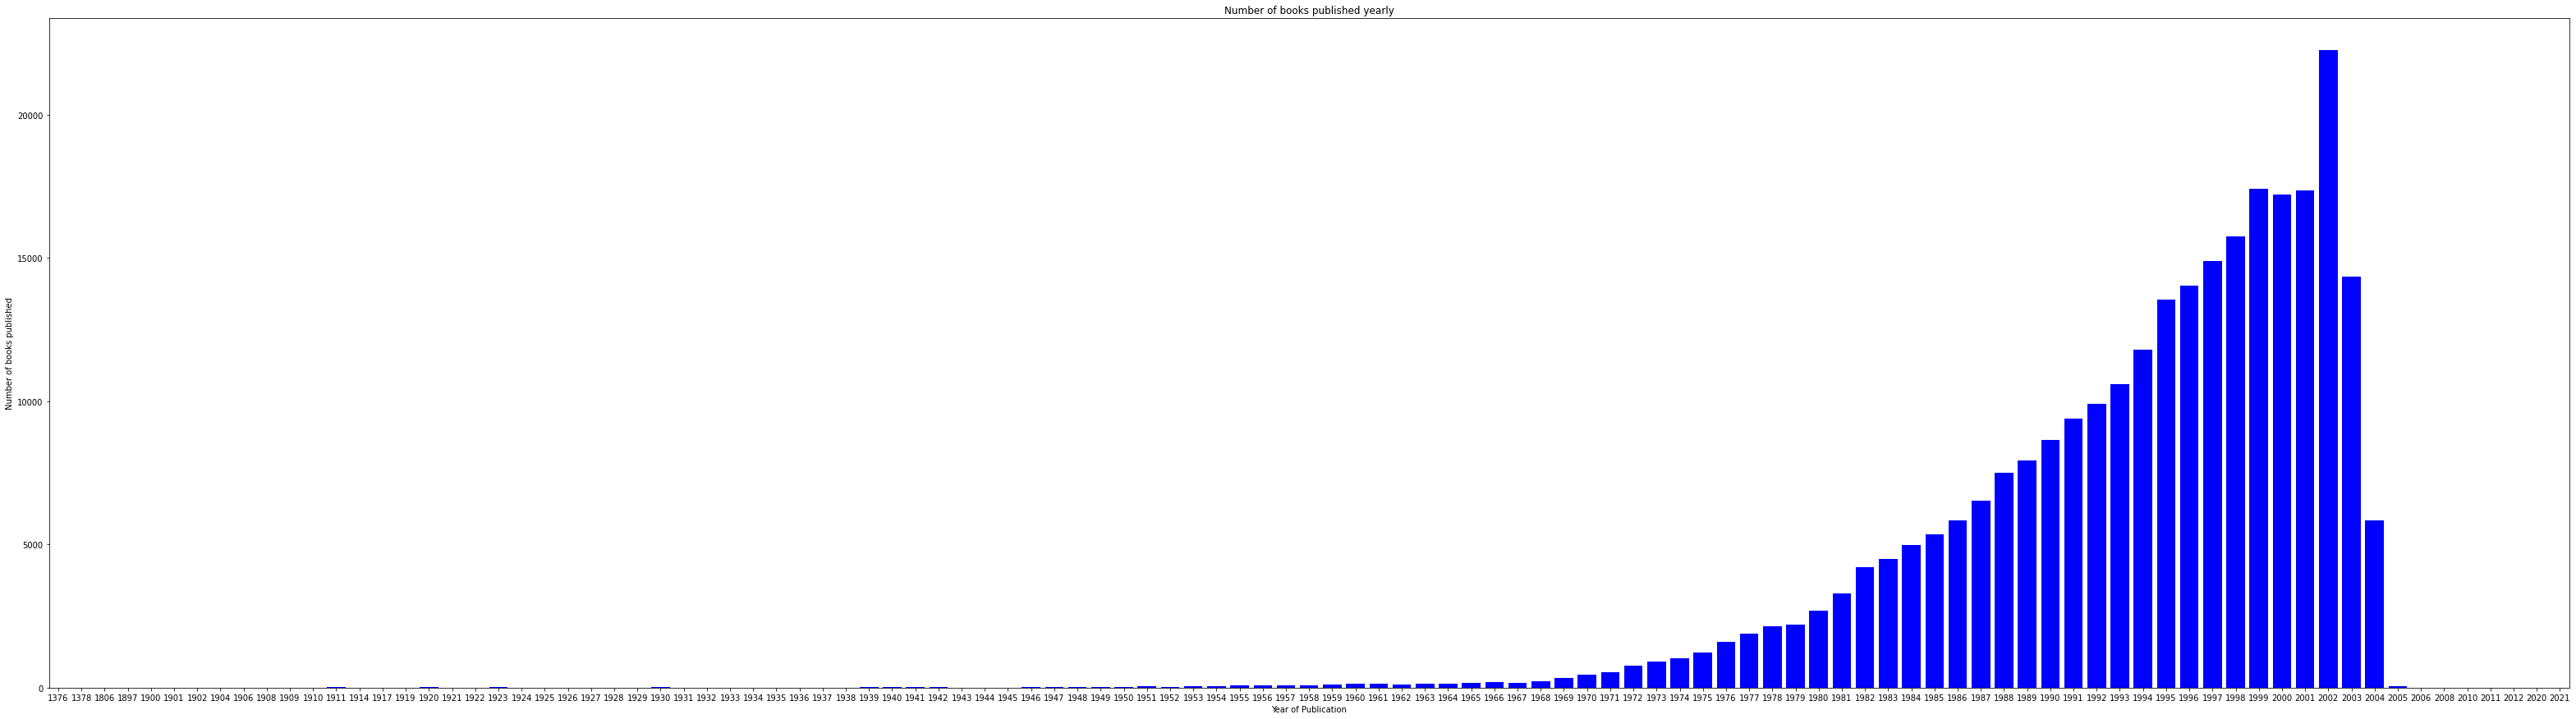

In [ ]:
# Lets plot bar graph for number of books published in different years
publications = {}
for year in books['Year-Of-Publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [ ]:
# creating dataframe for top 10 publisher
order=pd.value_counts(books['Publisher']).iloc[:10].reset_index().rename(columns={'index':'Publisher','Publisher':'Count'}).sort_values(by='Count',ascending=True)

In [ ]:
# bar graph of top 10 publisher
fig = px.histogram(x= order.Count,y=order.Publisher,orientation=None , width=650, height=450,
              text_auto=True,color=order.Publisher
             )
fig.update_layout(
    title='Top 10 Publishers',
    xaxis_title="Count",
    yaxis_title="Publisher",
    template="plotly_dark",
    
)
fig.show()

From the graph above we can see the top 10 publishers and among them Harlequin publishers are the publishers of most books.

In [ ]:
# creating dataframe for top 10 Author
author=pd.value_counts(books['Book-Author']).iloc[:10].reset_index().rename(columns={'index':'Author','Book-Author':'Count'}).sort_values(by='Count',ascending=True)

In [ ]:
# bar graph of top 10 publisher
fig = px.histogram(x= author.Count,y=author.Author,orientation=None , width=650, height=450,
              text_auto=True,color=author.Author
             )
fig.update_layout(
    title='Top 10 Author',
    xaxis_title="Count",
    yaxis_title="Author",
    template="plotly_dark",
    
)
fig.show()

From the graph above we can see the top 10 Author. We can see that Agatha Christie has written most number of books that is 632.

In [ ]:
# lets plot bar graph for number of books published per year
year_book=books['Year-Of-Publication'].value_counts().reset_index().rename(columns={'index':'Year','Year-Of-Publication':'Count'}).sort_values(by='Year',ascending=False)
fig = go.Figure()
fig.add_trace(go.Bar(x=year_book.Year, y=year_book.Count,
                
                marker_color='crimson',
                name='expenses'))
fig.update_layout(
    
    width=1000, height=450,
    title='Number of book publish per year',
    xaxis_title="Year",
    yaxis_title="Number of Books",
    template="plotly+presentation+xgridoff",
    
)
fig.show()

From the above graph we can see that most of the books are published between 1980-2000.


In [ ]:
 # top 10 Country 
country_count=user['Country'].value_counts()[:10].reset_index().rename(columns={'index':'country','Country':'count'}).sort_values(by='count',ascending=False)


In [ ]:
# top 10 country based on number of readers
fig = px.histogram(x= country_count['country'],y=country_count['count'],orientation=None , width=650, height=450,
              text_auto=True, color=country_count['country']
             )
fig.update_layout(
    title='Top 10 Country having highest number of reader',
    xaxis_title="country",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

As we can see from above plot most of the readers are from USA.

Lets see Top 10 state of USA having highest number of readers.

In [ ]:
# top 10 State of USA
state_usa=user.loc[user['Country']=='usa',['State']].value_counts()[:10].reset_index().rename(columns={0:'count'})


In [ ]:
# top 10  States of USA based on number of readers
fig = px.histogram(x= state_usa['State'],y=state_usa['count'],orientation=None , width=650, height=450,
              text_auto=True, color=state_usa['State']
             )
fig.update_layout(
    title='Top 10 States of USA having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

From above plot we can see that in USA california is having highest number of readers.




Lets see Top 10 city of California which is having highest number of readers.

In [ ]:
# Top 10 cities
cities=user.loc[(user['State']=='california'),['City']].value_counts()[:10].reset_index().rename(columns={0:'count'})
fig = px.histogram(x= cities['City'],y=cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=cities['City']
             )
fig.update_layout(
    title='Top 10 cities of USA having highest number of reader',
    xaxis_title="cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

In USA San diego is having highest number of reader followed by san francisco and Los Angeles.

Lets see worldwide which is state is having highest number of readers.

In [ ]:
# top 10 States of world based on number of readers
top_10_states=user['State'].value_counts()[:10].reset_index().rename(columns={'index':'state','State':'count'})
fig = px.histogram(x= top_10_states['state'],y=top_10_states['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_states['state']
             )
fig.update_layout(
    title='Top 10 State in the World having highest number of reader',
    xaxis_title="States",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

Here we can see that California is stil having highest number of reader.

Lets see world wide which city is having highest number of reader.

In [ ]:
# top 10 cities of world based on number of readers
top_10_cities=user['City'].value_counts()[:10].reset_index().rename(columns={'index':'city','City':'count'})
fig = px.histogram(x= top_10_cities['city'],y=top_10_cities['count'],orientation=None , width=650, height=450,
              text_auto=True, color=top_10_cities['city']
             )
fig.update_layout(
    title='Top 10 Cities in the World having highest number of reader',
    xaxis_title="Cities",
    yaxis_title="Number of readers",
    template="plotly_dark",
    
)
fig.show()

Here we can see that unlike cities in the United States, we have the largest number of readers here in London, followed by Barcelona.

In [ ]:
# lets define a function to calculate percentage of book rating
def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)

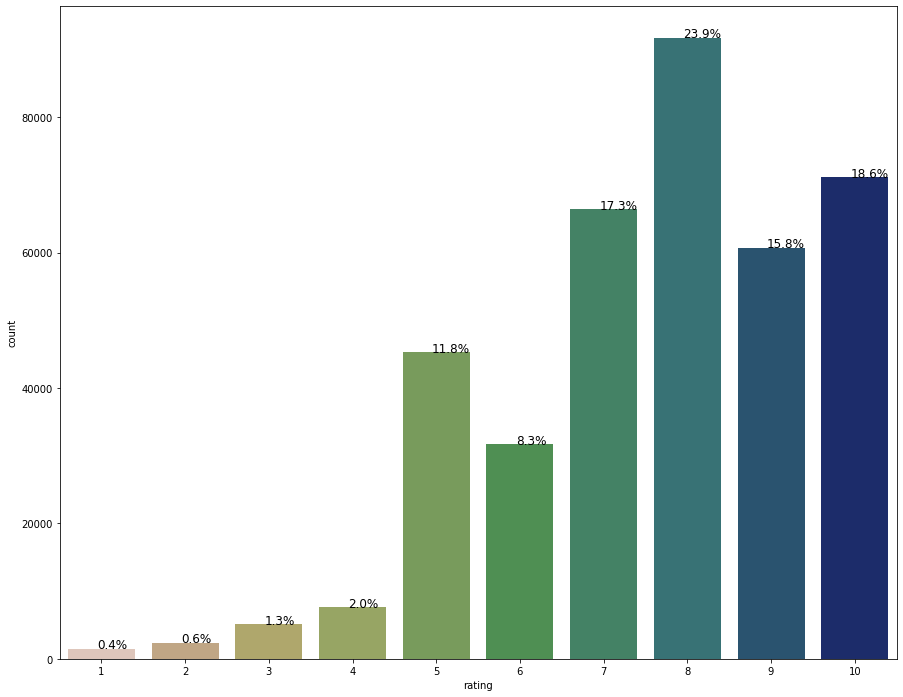

In [ ]:
# lets plot a bar graph for number of books of different ratings
plt.figure(figsize=(15,12))
ax=sns.countplot(x="rating", data=dataset,palette='gist_earth_r')
without_hue(ax,dataset['rating'])

===================================================================================================================

# Recommendation System


The different recommendation systems that we will be developing are as follows--

===================================================================================================================

## Popularity Based Filtering:-

As the name suggests Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.
Book weighted avg formula:

**Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]**

where,

**v** is the number of votes for the books;

**m** is the minimum votes required to be listed in the chart;

**R** is the average rating of the book; and

**C** is the mean vote across the whole report.

**Now we find the values of v,m,R,C.**

In [26]:
C= dataset['Avg_Rating'].mean()
m= dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = dataset.loc[dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569504972 , m=64.0


(38570, 13)

Here we used 90th percentile as our cutoff. In other words, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.

We see that there are 38570 books which qualify to be in this list. Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books:

In [27]:
def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [28]:
#Keeping only one entry of each book
Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('green',as_cmap=True)
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

#Printing the top 20 books
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20).style.background_gradient(cmap=cm)


,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690
5,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.596517
6,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.595653
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.508791
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.490549
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.484783


The Popularity based recommender provide a general chart of recommended books to all the users. They are not sensitive to the interests and tastes of a particular user.

===================================================================================================================

## Model Based Collaborative Filtering Recommender:-

The goal of the recommender system is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.
Collaborative filtering is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.
Model based approach involves building machine learning algorithms to predict user's ratings. They involve dimensionality reduction methods that reduce high dimensional matrix containing abundant number of missing values with a much smaller matrix in lower-dimensional space.
The goal of this section is to compare SVD and NMF algorithms, try different configurations of parameters and explore obtained results.

In [29]:
#lets import the important libraries to proceed
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt

This analysis will focus on book recommendations based on Book-Crossing dataset. To reduce the dimensionality of the dataset and avoid running into memory error we will focus on users with at least 3 ratings and top 10% most frequently rated books.
The recommender systems will be built using surprise package (Matrix Factorization - based models).

In [31]:
rating_explicit.rename(columns = {'User-ID':'user_id' ,'ISBN':'isbn' ,'Book-Rating':'book_rating'},inplace=True)

In [32]:
user_ratings_threshold = 3

filter_users = rating_explicit['user_id'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = rating_explicit[rating_explicit['user_id'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 3 ratings
Number of records: 327271


**SVD and NMF models comparison:-**

Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF) are matrix factorization techniques used for dimensionality reduction. Surprise package provides implementation of those algorithms.

In [33]:
# lets install the surprise package
!pip install surprise

     |████████████████████████████████| 11.8 MB 5.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630180 sha256=9a6afc6d3ad771d84bc654a4e1a348ff8216b8f878a18529e83c0ceeec4456e8
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [34]:
from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [35]:
df=df_ratings_top.copy()
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'rating']], reader)

In [36]:
model_svd = SVD()
cv_results_svd = cross_validate(model_svd, data, cv=3)
pd.DataFrame(cv_results_svd).mean()

test_rmse     1.615844
test_mae      1.246264
fit_time     18.841408
test_time     1.078166
dtype: float64

In [38]:
model_nmf = NMF()
cv_results_nmf = cross_validate(model_nmf, data, cv=3)
pd.DataFrame(cv_results_nmf).mean()

test_rmse     2.513114
test_mae      2.101729
fit_time     30.073708
test_time     1.088628
dtype: float64

It's clear that for the given dataset much better results can be obtained with SVD approach - both in terms of accuracy and training / testing time.

## Optimisation of SVD algorithm:-


Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.
It is used to find the best setting of parameters:
n_factors - the number of factors
n_epochs - the number of iteration of the SGD procedure
lr_all - the learning rate for all parameters
reg_all - the regularization term for all parameters
As a result, regarding the majority of parameters, the default setting is the most optimal one. The improvement obtained with Grid Search is very small.

In [39]:
param_grid = {'n_factors': [80,100],
              'n_epochs': [5, 20],
              'lr_all': [0.002, 0.005],
              'reg_all': [0.2, 0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

1.6111991738381601
{'n_factors': 80, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.2}


## Analysis of Collaborative Filtering model results:-

In this part, let's examine in detail the results obtained by the SVD model that provided the best RMSE score.

In [40]:
trainset, testset = train_test_split(data, test_size=0.2)

model = SVD(n_factors=80, n_epochs=20, lr_all=0.005, reg_all=0.2)
model.fit(trainset)
predictions = model.test(testset)

In [41]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
6692,97044,0884490343,8.0,6.711014,False,7.0,1.288986
11721,119575,0345422589,7.0,7.090978,False,7.0,0.090978
244,234721,0886775531,7.0,7.505395,False,8.0,0.505395
4031,183122,0066211611,9.0,7.424807,False,7.0,1.575193
22401,183532,0874778794,6.0,6.799728,False,7.0,0.799728


Distribution of actual and predicted ratings in the test set According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable. The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.


It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

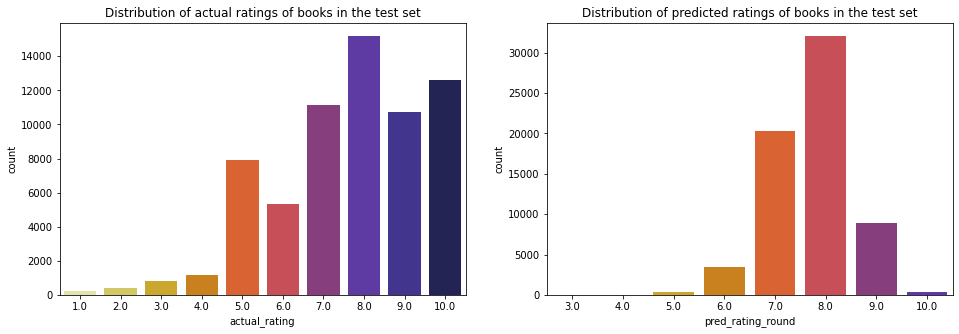

In [44]:
palette = sns.color_palette("CMRmap_r", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

## Absolute error of predicted ratings:-



The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.
How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations.

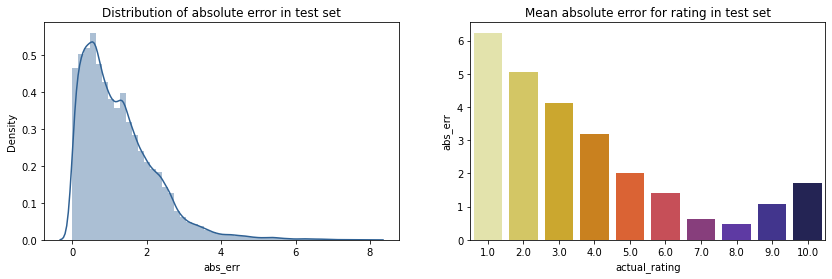

In [45]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

## Analysis of predicted ratings of a particular user:-


For this part of the analysis, the user with id 193458 was selected. By analyzing book ratings by this user, it can be noted that he/she likes diverse types of readings: English romantic novels (Pride and Prejudice, Sense and Sensibility), fantasy (Narnia) as well as historical novels (Schindler's List). Among the recommended books there are other works from Narnia's series, two historical novels and one romance which correlates with user's previous preferences.

In [46]:
df_books = books.copy()
df_books.rename(columns = {'ISBN':'isbn' ,'Book-Title':'book_title'},inplace=True)
df_ext = df.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_ext = df_ext.merge(df_pred[['isbn', 'user_id', 'pred_rating']], on=['isbn', 'user_id'], how='left')

## Train set: Top rated books:-

In [47]:
selected_user_id = 193458
df_user = df_ext[df_ext['user_id']==selected_user_id]

df_user[(df_user['pred_rating'].isna())&(df_user['rating']>=9)].sample(10)

,user_id,isbn,rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234895,193458,0064471098,9,8.733333,15,The Silver Chair,NaN
234969,193458,0789404257,9,9.000000,4,Eyewitness Travel Guide to Italy (revised),NaN
234955,193458,0670873888,9,9.000000,1,On South Mountain: The dark secrets of the Gol...,NaN
234950,193458,0553258001,9,8.236842,38,The Cider House Rules,NaN
234893,193458,0064471071,9,8.733333,15,The Voyage of the Dawn Treader (rack) (Narnia),NaN
234900,193458,0140298479,9,7.539823,113,Bridget Jones: The Edge of Reason,NaN
234894,193458,006447108X,9,8.833333,18,The Last Battle,NaN
234896,193458,0064471101,9,8.729730,37,The Magician's Nephew (rack) (Narnia),NaN
234901,193458,0140350047,9,8.800000,5,The Secret Garden (Puffin Classics),NaN
234921,193458,0345361792,10,8.607735,181,A Prayer for Owen Meany,NaN


## Test set: predicted top rated books:-

In [48]:
df_user[df_user['pred_rating'].notna()].sort_values('pred_rating', ascending=False).head(5)

,user_id,isbn,rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234907,193458,0142001740,9,8.452769,307,The Secret Life of Bees,8.241059
234899,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",8.087594
234997,193458,1853260622,5,8.272727,11,War and Peace (Wordsworth Classics),8.065074
234903,193458,014035039X,7,8.666667,3,Through the Looking Glass: And What Alice Foun...,7.918720
234931,193458,0394587863,8,8.466667,15,The Witching Hour (Lives of the Mayfair Witches),7.863333


## Test set: actual top rated books:-

In [49]:
df_user[df_user['pred_rating'].notna()].sort_values('rating', ascending=False).head(5)

,user_id,isbn,rating,Avg_Rating,Total_No_Of_Users_Rated,book_title,pred_rating
234994,193458,1853260002,10,8.217391,23,Pride &amp; Prejudice (Wordsworth Classics),7.712770
234899,193458,014011369X,9,9.125000,8,"And the Band Played on: Politics, People, and ...",8.087594
234977,193458,0887309100,9,7.600000,5,The Dilbert Future: Thriving on Business Stupi...,7.747585
234905,193458,0140620125,9,8.133333,15,Wuthering Heights (Penguin Popular Classics),7.768018
234907,193458,0142001740,9,8.452769,307,The Secret Life of Bees,8.241059


===================================================================================================================

# Collaborative Filtering based Recommendation System--(User-Item Based)

In [50]:
# lets import important libraries
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import correlation
import operator
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [51]:
# Taking book name and Number of recommendation of book
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter a book name: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Enter number of books to recommend: 5


In [52]:
df = pd.DataFrame(dataset['Book-Title'].value_counts())
df['Total-Ratings'] = df['Book-Title']
df['Book-Title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = dataset.merge(df, left_on = 'Book-Title', right_on = 'Book-Title', how = 'left')
df = df.drop(['Year-Of-Publication','Publisher','Age','City','State','Country'], axis=1)

popularity_threshold = 50
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [53]:
testdf = pd.DataFrame()
testdf['ISBN'] = popular_book['ISBN']
testdf['rating'] = popular_book['rating']
testdf['User-ID'] = popular_book['User-ID']
testdf = testdf[['User-ID','rating']].groupby(testdf['ISBN'])

In [54]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [55]:
def printBookDetails(bookID):
    print(dataset[dataset['ISBN']==bookID]['Book-Title'].values[0])
   

def getTopRecommandations(bookID):
    collaborative = []
    row = reverseIndexMap[bookID]
    print("Input Book:")
    printBookDetails(bookID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if dataset[dataset['ISBN']==indexMap[i]]['Book-Title'].values[0] not in similar:
                if mn>=number:
                      break
                mn+=1
                similar.append(dataset[dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(dataset[dataset['ISBN']==indexMap[i]]['Book-Title'].values[0])
    return collaborative

In [56]:
k = list(dataset['Book-Title'])
m = list(dataset['ISBN'])

collaborative = getTopRecommandations(m[k.index(bookName)])

Input Book:
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

RECOMMENDATIONS:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Chamber of Secrets (Book 2)
Fried Green Tomatoes at the Whistle Stop Cafe


## Correlation Based:-

In [57]:
popularity_threshold = 50

user_count = dataset['User-ID'].value_counts()
data = dataset[dataset['User-ID'].isin(user_count[user_count >= popularity_threshold].index)]
rat_count = data['rating'].value_counts()
data = data[data['rating'].isin(rat_count[rat_count >= popularity_threshold].index)]

matrix = data.pivot_table(index='User-ID', columns='ISBN', values = 'rating').fillna(0)

In [59]:
average_rating = pd.DataFrame(dataset.groupby('ISBN')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(rating.groupby('ISBN')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
ISBN,,
0971880107,4.390706,2502
0316666343,8.185290,1295
0385504209,8.435318,883
0060928336,7.887500,732
0312195516,8.182768,723


In [60]:
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
row = matrix[isbn]
correlation = pd.DataFrame(matrix.corrwith(row), columns = ['Pearson Corr'])
corr = correlation.join(average_rating['ratingCount'])

res = corr.sort_values('Pearson Corr', ascending=False).head(number+1)[1:].index
corr_books = pd.merge(pd.DataFrame(res, columns = ['ISBN']), books, on='ISBN')
print("\n Recommended Books: \n")
corr_books


 Recommended Books: 



,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
1,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2001,Scholastic
2,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
3,0804115613,Fried Green Tomatoes at the Whistle Stop Cafe,Fannie Flagg,2000,Ballantine Books
4,0439139600,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2002,Scholastic Paperbacks


## Nearest Neighbours Based:-


In [61]:
data = (dataset.groupby(by = ['Book-Title'])['rating'].count().reset_index().
        rename(columns = {'Book-Rating': 'Total-Rating'})[['Book-Title', 'rating']])
result = pd.merge(data, dataset, on='Book-Title')
result = result[result['rating_x'] >= popularity_threshold]
result = result.reset_index(drop = True)

In [62]:
## table pivot
matrix = result.pivot_table(index = 'Book-Title', columns = 'User-ID', values = 'rating_x').fillna(0)
up_matrix = csr_matrix(matrix)

In [63]:
model = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model.fit(up_matrix)

distances, indices = model.kneighbors(matrix.loc[bookName].values.reshape(1, -1), n_neighbors = number+1)
print("\nRecommended books:\n")
for i in range(0, len(distances.flatten())):
    if i > 0:
        print(matrix.index[indices.flatten()[i]]) 


Recommended books:

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Order of the Phoenix (Book 5)
The Fellowship of the Ring (The Lord of the Rings, Part 1)


## Content Based:-

In [64]:
popularity_threshold = 80
popular_book = df[df['Total-Ratings'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(44619, 8)

In [65]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['Book-Title'])
tfidf_matrix.shape

(44619, 1112)

In [66]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(44619, 44619)

In [67]:
print("Recommended Books:\n")
isbn = books.loc[books['Book-Title'] == bookName].reset_index(drop = True).iloc[0]['ISBN']
content = []

idx = popular_book.index[popular_book['ISBN'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['Book-Title'][i] != bookName and popular_book['Book-Title'][i] not in similar_items and len(similar_items) < number:
        similar_items.append(popular_book['Book-Title'][i])
        content.append(popular_book['Book-Title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Order of the Phoenix (Book 5)


## Hybrid Approach (Content+Collaborative) Using percentile:-

In [68]:
z = list()
k = float(1/number)
for x in range(number):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w=0
print("Input Book:\n")
print(bookName)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w>=number:
        break
    w+=1
    print(x)

Input Book:

Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))

Recommended Books:

Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Order of the Phoenix (Book 5)


# Collaborative Filtering based Recommendation System--(User-Item based)

In [69]:
rating_explicit.head()
rating_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [71]:
rating_explicit.head()

,User-ID,ISBN,rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [73]:
users_interactions_count_df = rating_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68091
# of users with at least 5 interactions: 449


In [75]:
print('# of interactions: %d' % len(rating_explicit))
interactions_from_selected_users_df = rating_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383842
# of interactions from users with at least 5 interactions: 103271


In [76]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000000,1
1,2033,0060248025,10,8.766667,30
2,2033,0060256664,10,8.333333,6
3,2033,0060256737,10,9.045455,22
4,2033,0060950536,10,9.400000,5
5,2033,0061020419,7,7.000000,1
6,2033,0061020427,6,6.000000,1
7,2033,0061056278,10,9.000000,2
8,2033,0061056286,8,7.666667,3
9,2033,0061056294,9,7.000000,2


In [77]:
import math

In [78]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103271


,ISBN,User-ID,rating
0,0000913154,171118,3.169925
1,0001046438,23902,3.321928
2,000104687X,23902,2.807355
3,0001047213,23902,3.321928
4,0001047973,23902,3.321928


In [79]:
from sklearn.model_selection import train_test_split 

In [80]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42,)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82616
# interactions on Test set: 20655


In [81]:
interactions_test_df.head()

,ISBN,User-ID,rating
87596,0879051213,95010,3.000000
52630,0515101230,129074,3.000000
68434,0679427724,75819,3.169925
85835,0843951346,135149,3.321928
92752,1551665727,158295,3.169925


In [82]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [85]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [86]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 12

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [87]:
users_items_pivot_matrix.shape

(449, 55743)

In [88]:
U.shape

(449, 12)

In [89]:
sigma = np.diag(sigma)
sigma.shape

(12, 12)

In [90]:
Vt.shape

(12, 55743)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [91]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 2.62206715e-02,  3.97350202e-03,  4.70182373e-03, ...,
         1.02628920e-04,  3.46975615e-04,  3.16700270e-03],
       [ 4.10785318e-03, -2.12791913e-04, -2.51795535e-04, ...,
         4.64353850e-05,  1.04160022e-04,  9.39852813e-04],
       [ 4.48771337e-03, -6.29288514e-04, -7.44633739e-04, ...,
         9.48566209e-05,  2.54799688e-04,  2.13530628e-03],
       ...,
       [ 1.03021309e-02,  3.63500024e-03,  4.30127639e-03, ...,
         7.86583738e-05,  1.71570440e-04,  1.66888361e-03],
       [ 2.01410405e-02, -3.23814018e-04, -3.83167399e-04, ...,
         1.68822240e-04,  3.54759017e-04,  3.48212482e-03],
       [ 8.77622687e-04,  5.64808952e-03,  6.68335419e-03, ...,
         3.96499174e-05,  6.47102205e-05,  7.32636937e-04]])

In [92]:
all_user_predicted_ratings.shape

(449, 55743)

In [93]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.026221,0.004108,0.004488,0.009121,-0.001153,0.002134,0.001350,0.023186,0.010196,0.035515,...,0.011128,0.019416,0.009915,0.016783,-0.003976,0.021694,0.020988,0.010302,0.020141,0.000878
000104687X,0.003974,-0.000213,-0.000629,0.020015,-0.000508,0.010179,0.015187,0.011271,-0.000875,0.021808,...,-0.000056,0.016405,0.002521,0.015567,-0.002296,-0.001785,0.011500,0.003635,-0.000324,0.005648
0001047213,0.004702,-0.000252,-0.000745,0.023684,-0.000601,0.012045,0.017970,0.013337,-0.001035,0.025806,...,-0.000066,0.019412,0.002983,0.018421,-0.002716,-0.002112,0.013608,0.004301,-0.000383,0.006683
0001047973,0.004702,-0.000252,-0.000745,0.023684,-0.000601,0.012045,0.017970,0.013337,-0.001035,0.025806,...,-0.000066,0.019412,0.002983,0.018421,-0.002716,-0.002112,0.013608,0.004301,-0.000383,0.006683
000104799X,0.000631,0.000252,0.000522,0.001383,0.000193,0.000647,0.000779,0.001187,0.001132,0.002285,...,0.000722,0.001497,0.001706,0.000615,0.000997,0.001128,0.001289,0.000399,0.000928,0.000185


In [94]:
len(cf_preds_df.columns)

449

In [95]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [96]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [97]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [98]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [99]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()

### Let's recommend books to User-Id 69078 and see the results.

In [100]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation   69078
Recommendation for User-ID =  69078
         ISBN                                         Book-Title  recStrength
0  0312195516                The Red Tent (Bestselling Backlist)     0.377661
1  0385504209                                  The Da Vinci Code     0.329691
2  0312966970             Four To Score (A Stephanie Plum Novel)     0.329657
3  0671001795                                  Two for the Dough     0.323928
4  0446610038                                1st to Die: A Novel     0.317324
5  0061009059  One for the Money (Stephanie Plum Novels (Pape...     0.315896
6  0312980140                  Seven Up (A Stephanie Plum Novel)     0.314485
7  0440214041                                  The Pelican Brief     0.309228
8  0142001740                            The Secret Life of Bees     0.297225
9  0440226430                                     Summer Sisters     0.297103


## Evaluate:-


In Recommender Systems, there are a set metrics commonly used for evaluation. We choose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.
This evaluation method works as follows:

* For each user:-

    * For each item the user has interacted in test set.
    * Sample 100 other items the user has never interacted.
    * Ask the recommender model to produce a ranked list of recommended items, from a set composed of one interacted item and the 100 non-interacted items
    * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [103]:
 #Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(rating_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics

     # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()

In [104]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.22556281771968045, 'recall@10': 0.29784555797627693}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
10,293,356,1389,0.210943,0.256299,11676
31,182,236,1138,0.159930,0.207381,98391
45,27,36,380,0.071053,0.094737,189835
30,90,110,369,0.243902,0.298103,153662
70,28,36,236,0.118644,0.152542,23902
7,29,36,204,0.142157,0.176471,235105
47,21,29,203,0.103448,0.142857,76499
50,27,38,193,0.139896,0.196891,171118
42,65,78,192,0.338542,0.406250,16795
43,22,30,188,0.117021,0.159574,248718


### Evaluating the Collaborative Filtering model (SVD matrix factorization), we observe that we got Recall@5 (22%) and Recall@10 (29%).

===================================================================================================================

# Conclusion:-

* In EDA, the Top-10 most rated books were essentially novels. Books like The Lovely Bone and The Secret Life of Bees were very well perceived.
* Majority of the readers were of the age bracket 20–35 and most of them came from North American and European countries namely USA, Canada, UK, Germany and Spain.
* If we look at the ratings distribution, most of the books have high ratings with maximum books being rated 8. Ratings below 5 are few in number.
* Author with the most books was Agatha Christie, William Shakespeare and Stephen King.
* For modelling, it was observed that for model based collaborative filtering SVD technique worked way better than NMF with lower Mean Absolute Error (MAE) .
* Amongst the memory based approach, item-item CF performed better than user-user CF because of lower computation requirements .

===================================================================================================================

# Challenges:-

* Handling of sparsity was a major challenge as well since the user interactions were not present for the majority of the books.
* Understanding the metric for evaluation was a challenge as well.
* Since the data consisted of text data, data cleaning was a major challenge in features like Location etc..
* Decision making on missing value imputations and outlier treatment was quite challenging as well.

===================================================================================================================

# Future Scope:-

* Given more information regarding the books dataset, namely features like Genre, Description etc., we could implement a content-filtering based recommendation system and compare the results with the existing collaborative-filtering based system.
* We would like to explore various clustering approaches for clustering the users based on Age, Location etc., and then implement voting algorithms to recommend items to the user depending on the cluster into which it belongs.


===================================================================================================================

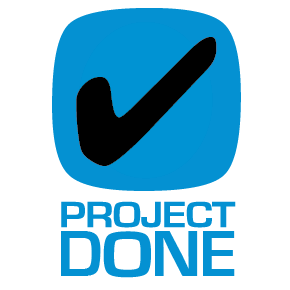

===================================================================================================================